In [1]:
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
update_all = False
update = True
karg_csvr = dict(sep=';', decimal=',', index_col='date', parse_dates=True)

if os.path.isfile('comisiones/comisiones.csv'):
    df_old = pd.read_csv('comisiones/comisiones.csv', **karg_csvr)
    last_old = df_old.index[-1].strftime("%Y-%m-%d")
else:
    last_old = '1981-06-30'

inicio = '1981-06-30' if update_all else last_old
fin = datetime.now()

In [3]:
if update:
    # Descargar datos de comisiones (Lento)
    rng = pd.date_range(start=inicio, end=fin, freq='MS')
    dfs = []
    for day in rng:
        url = 'http://www.safp.cl/safpstats/stats/apps/estcom/estcom.php?fecha=%s'%day.strftime("%Y%m%d")
        aux = pd.read_html(url)
        # Por depósito de cotizaciones
        # aux[20].iloc[2:,0:2]
        # Por retiros programados y renta temporal
        # aux[23].iloc[2:,0:2]
        # Por transferencia de cotizaciones de afiliado voluntario
        # aux[25].iloc[2:-1,0:2]
        df = aux[19].loc[3:8,0:1]
        df['date'] = day
        dfs.append(df.pivot(index='date', columns=0, values=1))
        time.sleep(1)
    # Concatena datos descargados
    df_s = pd.concat(dfs)
    if df_s.columns.contains(u'(*)'):
        df_s.drop(labels=[u'(*)'], axis=1, inplace=True)
    df_new = df_s.apply(pd.to_numeric, errors='coerce').div(100.)
    df = pd.concat([df_old, df_new])
    # Remove duplicate index
    df = df[~df.index.duplicated(keep='last')]
    # Opciones lectura y escritura de archivos csv compatibles con excel spanish
    karg_csvw = dict(sep=';', decimal=',')
    df.to_csv('comisiones/comisiones.csv', **karg_csvw)
else:
    df = pd.read_csv('comisiones/comisiones.csv', **karg_csvr)

In [4]:
df.tail(12)

,CAPITAL,CUPRUM,HABITAT,MODELO,PLANVITAL,PROVIDA
date,,,,,,
2016-07-01,0.0144,0.0148,0.0127,0.0077,0.0047,0.0154
2016-08-01,0.0144,0.0148,0.0127,0.0077,0.0041,0.0154
2016-09-01,0.0144,0.0148,0.0127,0.0077,0.0041,0.0154
2016-10-01,0.0144,0.0148,0.0127,0.0077,0.0041,0.0154
2016-11-01,0.0144,0.0148,0.0127,0.0077,0.0041,0.0154
2016-12-01,0.0144,0.0148,0.0127,0.0077,0.0041,0.0154
2017-01-01,0.0144,0.0148,0.0127,0.0077,0.0041,0.0154
2017-02-01,0.0144,0.0148,0.0127,0.0077,0.0041,0.0154
2017-03-01,0.0144,0.0148,0.0127,0.0077,0.0041,0.0154


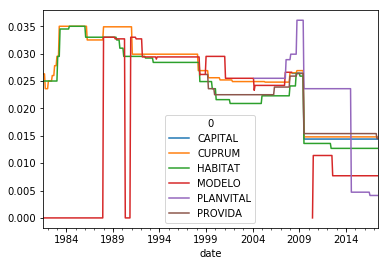

In [5]:
df.plot()